<a href="https://colab.research.google.com/github/McReader/ml-intro/blob/2_data_exploration/2_data_exploration/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The goal of this notebook is to provide some insights into the general dataset statistics and to explore what variables influenced Titanic's passenger survival 

# Context

In [18]:
import pandas as pd
import numpy as np

train_data = pd.read_csv('train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


There are following variables represented in this dataframe:
* **survival** - Survival, where values are *0 = No, 1 = Yes*
* **pclass** - Ticket class, where values are *1 = 1st, 2 = 2nd, 3 = 3rd*
* **sex** - Sex	
* **Age** - Age in years	
* **sibsp** - # of siblings/spouses aboard the Titanic	
* **parch**	- # of parents/children aboard the Titanic	
* **ticket** - Ticket number	
* **fare** - Passenger fare	
* **cabin** - Cabin number	
* **embarked** - Port of Embarkation, where values are *C = Cherbourg, Q = Queenstown, S = Southampton*




# Data quality assessment

## Nulls and data types

In [19]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


Data types looks correct, but we need to drop the observations with null values

Let's drop the rows with where the following variables have *null* values:
1.   Age
2.   Ticket
3.   Fare

I don't drop the rows where **Cabin** and **Embarked** columns are *null* intentionally as we don't want to loose the pretty big part of dataset for the exploration. 

For the exploration where these columns matter we'll create a separate dataframe where all the *null*s are dropped

In [20]:
titanic_data = train_data.dropna(subset=['Age', 'Ticket', 'Fare'])
pd.isna(titanic_data).sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin          61149
Embarked         238
dtype: int64

## Duplicates

Let's count how many items are with the duplicated ticket number and drop them as well

In [21]:
titanic_data = titanic_data.drop_duplicates(subset="Ticket")
len(train_data)-len(titanic_data)

26823

As a result we have the following picture

In [22]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73177 entries, 2 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  73177 non-null  int64  
 1   Survived     73177 non-null  int64  
 2   Pclass       73177 non-null  int64  
 3   Name         73177 non-null  object 
 4   Sex          73177 non-null  object 
 5   Age          73177 non-null  float64
 6   SibSp        73177 non-null  int64  
 7   Parch        73177 non-null  int64  
 8   Ticket       73177 non-null  object 
 9   Fare         73177 non-null  float64
 10  Cabin        25080 non-null  object 
 11  Embarked     72995 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 7.3+ MB


# Data exploration

In [34]:
titanic_data[['Pclass', 'Age', 'Fare']].describe()

,Pclass,Age,Fare
count,73177.000000,73177.000000,73177.000000
mean,2.063640,38.457528,46.167749
std,0.841704,18.273161,71.745904
min,1.000000,0.080000,0.990000
25%,1.000000,25.000000,10.270000
50%,2.000000,39.000000,25.320000
75%,3.000000,53.000000,35.090000
max,3.000000,86.000000,744.660000


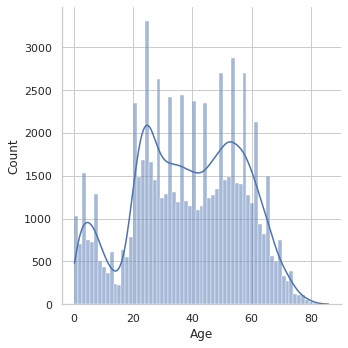

In [35]:
import seaborn as sns
sns.set_theme(style="whitegrid")

sns.displot(titanic_data, x="Age", kde=True)

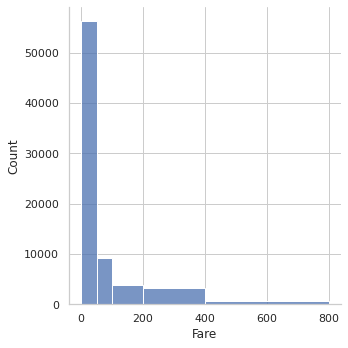

In [36]:
sns.displot(titanic_data, x="Fare", bins=[0, 50, 100, 200, 400, 800])

In [42]:
passengers_characteristics = titanic_data.drop('PassengerId', axis=1)

correlation = passengers_characteristics.corr(method='pearson')
correlation_without_duplicates = correlation.mask(np.tril(np.ones(correlation.shape)).astype(bool))
top_correlated_features = correlation_without_duplicates.unstack().sort_values(ascending=False).dropna() # .head().index.to_list()

top_correlated_features

Parch   SibSp       0.215943
Fare    Survived    0.200797
        Age         0.112843
Age     Survived    0.109902
Fare    SibSp       0.066785
        Parch       0.054645
Parch   Survived    0.026312
SibSp   Survived   -0.004521
Parch   Pclass     -0.032663
SibSp   Pclass     -0.068011
        Age        -0.110257
Parch   Age        -0.127815
Age     Pclass     -0.266324
Pclass  Survived   -0.314372
Fare    Pclass     -0.409946
dtype: float64

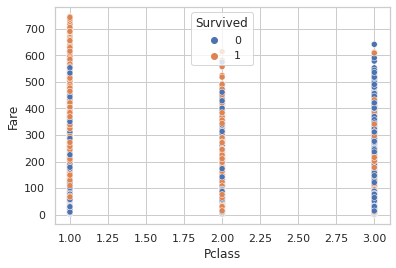

In [40]:
sns.scatterplot(data=titanic_data, x="Pclass", y="Fare", hue="Survived")

# Summary